In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import altair as alt



In [3]:
# df_2021 = pd.read_csv('/content/drive/MyDrive/Project 2 - Data Science & Big Data/Internal/Hospital_Inpatient_Discharges_2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Project 2 - Data Science & Big Data/Internal/Hospital_Inpatient_Discharges_2022.csv')

<ipython-input-3-671c23ec9bb6>:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('/content/drive/MyDrive/Project 2 - Data Science & Big Data/Internal/Hospital_Inpatient_Discharges_2022.csv')


In [4]:
df = df_2022.copy()
df_original = df_2022.copy()
# df = pd.concat([df_2021, df_2022])

In [5]:
target = 'Length of Stay'

## PART 1: BASIC DATA EXPLORATION

In [6]:
# =================================================================
# PART 1: BASIC DATA EXPLORATION
# =================================================================
print("=" * 80)
print("PHASE 1: BASIC DATA EXPLORATION")
print("=" * 80)

# Display basic dataset information
print("\nDataset Shape:", df.shape)
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Display column names and data types
print("\nData Types:")
print(df.dtypes)

# Deleting duplicate rows
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

# Display basic descriptive statistics
print("\nBasic Statistics:")
display(df.describe().T)

# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())

PHASE 1: BASIC DATA EXPLORATION

Dataset Shape: (2103433, 33)

Number of rows: 2103433
Number of columns: 33

Data Types:
Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number           float64
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCSR Diagnosis Code                     object
CCSR Diagnosis Description              object
CCSR Procedure Code                     object
CCSR Procedure Description              object
APR DRG Code                    

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,2094552.0,5.037487e+06,2.247673e+06,101000.0,2952005.0,5907002.0,7002024.0,7004010.0
Permanent Facility Id,2095123.0,1.042584e+03,7.312751e+02,1.0,541.0,1072.0,1453.0,10355.0
Discharge Year,2100511.0,2.022000e+03,0.000000e+00,2022.0,2022.0,2022.0,2022.0,2022.0
APR DRG Code,2100511.0,4.130175e+02,2.437725e+02,1.0,194.0,383.0,640.0,956.0
APR MDC Code,2100511.0,1.028664e+01,5.969018e+00,0.0,5.0,9.0,15.0,25.0
APR Severity of Illness Code,2100511.0,2.147733e+00,9.621628e-01,0.0,1.0,2.0,3.0,4.0



First 5 rows of the dataset:


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"51,514.62","7,552.54"
1,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,M,Black/African American,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"25,370.86","3,469.55"
2,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,N,"23,876.78","6,180.33"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,100,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"43,319.05","12,588.93"
4,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,M,Other Race,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,"40,266.23","10,355.99"


## PART 2: PREPROCESSING ON FEATURES

In [7]:
# =================================================================
# PART 2: PREPROCESSING ON FEATURES
# =================================================================

# Convert Discharge Year to datetime for proper temporal analysis
df['Discharge Year'] = pd.to_datetime(df['Discharge Year'].astype(str), format='%Y')

# Convert numeric columns to numeric
columns_to_convert = [
    "Operating Certificate Number",
    "Discharge Year",
    "Zip Code - 3 digits",
    "Total Charges",
    "Total Costs",
    "Birth Weight",
    "Length of Stay"
]

# Convert each column to numeric
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'Emergency Department Indicator' to binary
df['Emergency Department Indicator'] = df['Emergency Department Indicator'].map({'Y': 1, 'N': 0})

# Convert ID-like columns to string to avoid being treated as continuous variables
df['Operating Certificate Number'] = df['Operating Certificate Number'].astype(str)
df['Permanent Facility Id'] = df['Permanent Facility Id'].astype(str)


# Convert 'APR Severity of Illness Code' to numeric
df['APR Severity of Illness Code'] = pd.to_numeric(df['APR Severity of Illness Code'], errors='coerce')

#  Ordinal ordering for APR Risk of Mortality
mortality_order = {'Minor': 0, 'Moderate': 1, 'Major': 2, 'Extreme': 3}
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].map(mortality_order)

# One hot encoding for APR Medical Surgical Description
df = pd.get_dummies(df, columns=['APR Medical Surgical Description'], drop_first=True)

# Taking mid point for age groups
# Create a dictionary to map each age group to its midpoint
age_group_mapping = {
    '0 to 17': 9,
    '18 to 29': 27,
    '30 to 49': 43,
    '50 to 69': 58,
    '70 or Older': 70
}

# Map the Age Group to its midpoint value
df['Age Group Numeric'] = df['Age Group'].map(age_group_mapping)


# race_mapping = {
#     'White': 1,
#     'Black/African American': 2,
#     'Other': 3,
#     'Multi-racial': 4
# }

# df['Race'] = df['Race'].map(race_mapping)

# ethnicity_mapping = {
#     'Not Span/Hispanic': 1,
#     'Spanish/Hispanic': 2,
#     'Unknown': 3,
#     'Multi-ethnic': 4
# }

# # df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
# hsa_mapping = {
#     'New York City': 1,
#     'Long Island': 2,
#     'Hudson Valley': 3,
#     'Western NY': 4,
#     'Capital/Adirondack': 5,
#     'Central NY': 6,
#     'Finger Lakes': 7,
#     'Southern Tier': 8
# }

# df['Hospital Service Area'] = df['Hospital Service Area'].map(hsa_mapping)


bins = [0.5, 2.5, 5.5, np.inf]
labels = ["1-2","3-5", "6+"]

# bins = [0.5, 1.5, 2.5 , 4.5 , np.inf]
# labels = ['1','2','3-4','5+']


# Create a new column 'LOS_class' based on the bins.
# Setting right=False means intervals are [lower, upper)
df['LOS_class'] = pd.cut(df['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(df['LOS_class'].value_counts())


# Create a new column 'LOS_class' based on the bins.
# Setting right=False means intervals are [lower, upper)
df['LOS_class'] = pd.cut(df['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(df['LOS_class'].value_counts())


Length of Stay Class Distribution:
LOS_class
1-2    835072
3-5    651300
6+     612037
Name: count, dtype: int64
Length of Stay Class Distribution:
LOS_class
1-2    835072
3-5    651300
6+     612037
Name: count, dtype: int64


## PART 3: OUTLIER DETECTION


📊 Outlier Summary (IQR Method):


,Column,Lower Bound,Upper Bound,Outlier Count,Total Rows,Outlier %
1,Length of Stay,-4.000000e+00,1.200000e+01,209627,2100511,9.98
7,Birth Weight,2.000000e+03,4.400000e+03,8086,2100511,0.38
10,Total Costs,2.457012e+02,1.317731e+03,369,2100511,0.02
0,Zip Code - 3 digits,8.250000e+01,1.505000e+02,0,2100511,0.00
3,APR DRG Code,-4.750000e+02,1.309000e+03,0,2100511,0.00
2,Discharge Year,1.640995e+18,1.640995e+18,0,2100511,0.00
5,APR Severity of Illness Code,-2.000000e+00,6.000000e+00,0,2100511,0.00
4,APR MDC Code,-1.000000e+01,3.000000e+01,0,2100511,0.00
6,APR Risk of Mortality,-3.000000e+00,5.000000e+00,0,2100511,0.00
8,Emergency Department Indicator,-1.500000e+00,2.500000e+00,0,2100511,0.00


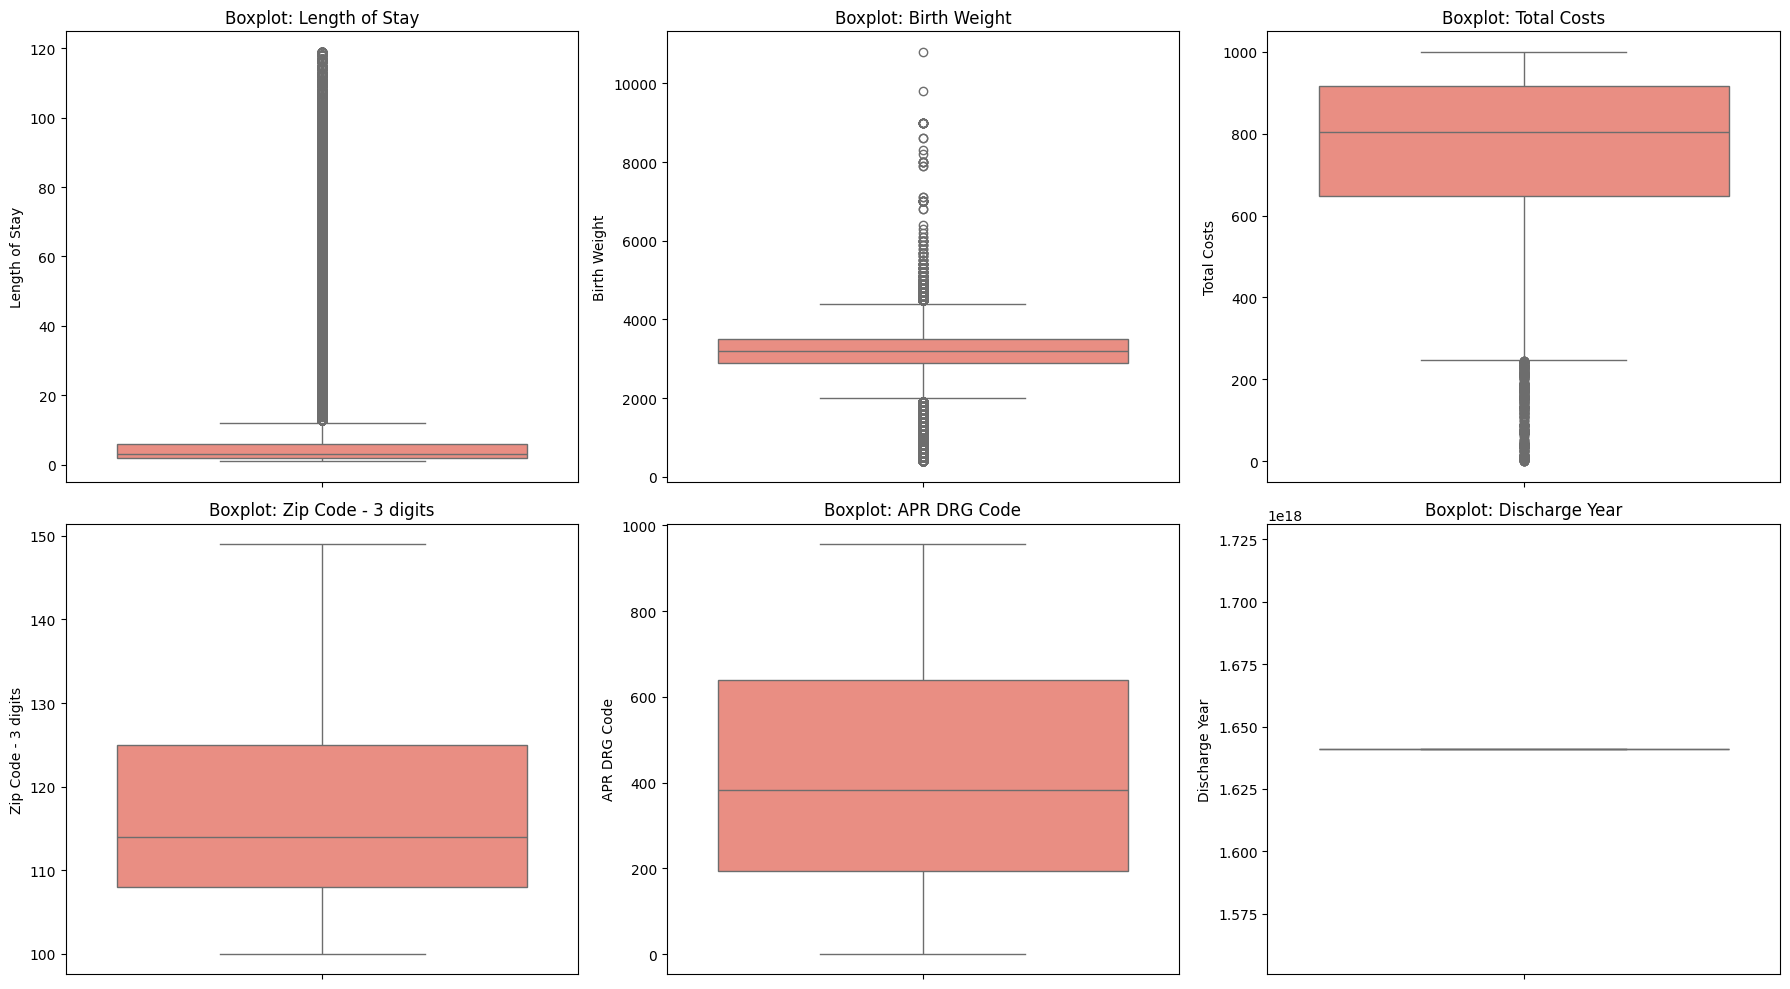

In [8]:
# =================================================================
# PART 3: OUTLIER DETECTION
# =================================================================

# Ensure numeric columns are correct
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Detect outliers using IQR
def detect_outliers_summary(data):
    summary = []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((data[col] < lower) | (data[col] > upper)).sum()
        summary.append({
            'Column': col,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outlier Count': outliers,
            'Total Rows': data.shape[0],
            'Outlier %': round(outliers / data.shape[0] * 100, 2)
        })
    return pd.DataFrame(summary)

df = df.loc[:, ~df.columns.duplicated()]


outlier_summary = detect_outliers_summary(df_numeric)
print("\n📊 Outlier Summary (IQR Method):")
display(outlier_summary.sort_values(by='Outlier %', ascending=False))

top_cols = outlier_summary.sort_values(by='Outlier %', ascending=False)['Column'].head(6)

plt.figure(figsize=(18, 10))
for i, coll in enumerate(top_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[coll], color='salmon')
    plt.title(f'Boxplot: {coll}')
    plt.ylabel(coll)

plt.tight_layout()
plt.show()

# LOS has around 10% outliers and Birth weight has 1%. Capping the outliers to the upper/lower bound (flexible to change based on model)
# df['Length of Stay'] = df['Length of Stay'].clip(0, 12)
# df['Birth Weight'] = df['Birth Weight'].clip(1850, 4650)


Outliers mostly seen in Length of Stay (10%), Total Charges, Total Cost, Birth Weight (1%) <br>
Not handled at the moment

## PART 4: MISSING VALUE ANALYSIS


PART 4: MISSING VALUE ANALYSIS

Missing values in each column:


,Missing Values,Percentage (%)
Total Charges,2099446,99.949298
Total Costs,2076655,98.864276
Birth Weight,1894895,90.211144
Payment Typology 3,1812157,86.272198
Payment Typology 2,1119612,53.301887
CCSR Procedure Code,580986,27.659270
CCSR Procedure Description,580986,27.659270
Zip Code - 3 digits,102656,4.887192
Hospital Service Area,5388,0.256509
Hospital County,5388,0.256509


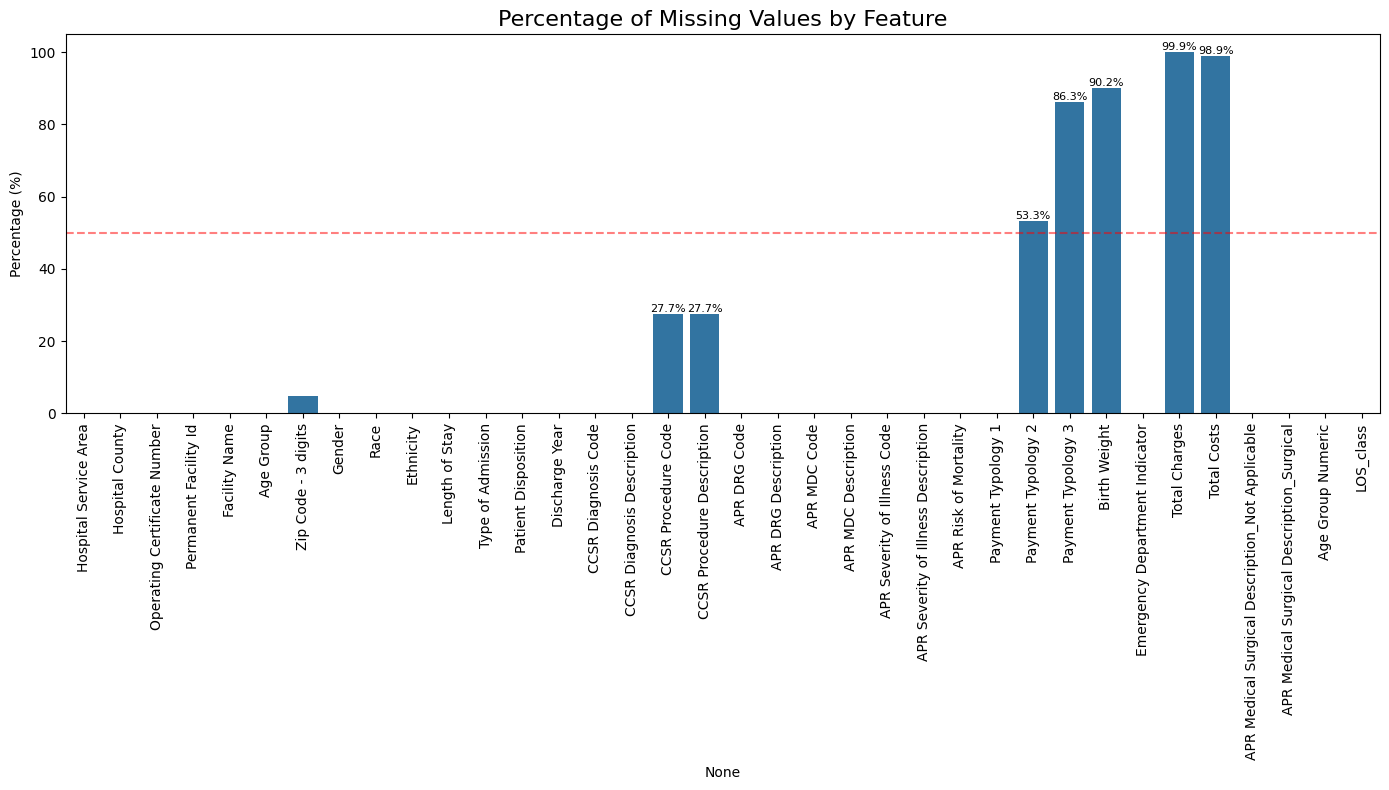


Target Variables Missing Values:


,Length of Stay
Missing Values,2102.000000
Percentage (%),0.100071


In [9]:

# =================================================================
# PART 4: MISSING VALUE ANALYSIS
# =================================================================
print("\n" + "=" * 80)
print("PART 4: MISSING VALUE ANALYSIS")
print("=" * 80)

# Calculate missing values and percentages
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / df.shape[0]) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Values', 'Percentage (%)']
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data = missing_data.sort_values('Percentage (%)', ascending=False)

# Display missing values information
print("\nMissing values in each column:")
display(missing_data)

# Visualize missing values (display directly in the notebook)
plt.figure(figsize=(14, 8))
plt.title('Percentage of Missing Values by Feature', fontsize=16)
ax = sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.axhline(y=50, color='r', linestyle='--', alpha=0.5)  # Reference line at 50%
plt.tight_layout()
for i, p in enumerate(ax.patches):
    if p.get_height() > 5:  # Only show text for columns with >5% missing
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom', fontsize=8)
plt.show()

# Focus on missing values in target variables
print("\nTarget Variables Missing Values:")
display(missing_data.loc[target])




Birth Weight, Payment Typology - 2, Payment Typology - 3 have the most amount of missing values. These are dropped

## PART 5: IMPUTATION

In [10]:
# =================================================================
# PART 5: IMPUTATION
# =================================================================

# Categorical – Mode
categorical_impute_cols = [
    'Zip Code - 3 digits',
    'Hospital Service Area',
    'Hospital County',
    'APR Severity of Illness Description',
    'APR Risk of Mortality'
]

for col in categorical_impute_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# KNN imputation for LOS
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
df[['Length of Stay']] = knn.fit_transform(df[['Length of Stay']])


## PART 6: VARIANCE THRESHOLD


In [11]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Emergency Department Indicator', 'Total Charges',
       'Total Costs', 'APR Medical Surgical Description_Not Applicable',
       'APR Medical Surgical Description_Surgical', 'Age Group Numeric',
       'LOS_class'],
      dtype='object')

In [12]:
# =================================================================
# PART 6: VARIANCE THRESHOLD
# =================================================================

import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import altair as alt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Define the thresholds (range of variance to test)
thresholds = np.arange(0.0, 0.55, 0.05)

# Store results of the number of features after variance thresholding
results = []
for t in thresholds:
    # Apply VarianceThreshold with the given threshold
    transform = VarianceThreshold(threshold=t)

    # Transform numeric data
    X_sel = transform.fit_transform(numeric_df)

    # Store the number of features remaining after applying the threshold
    n_features = X_sel.shape[1]
    print(f'Threshold={t:.2f}, Features={n_features}')

    results.append(n_features)

# Prepare the results for visualization
d2 = pd.DataFrame({'threshold': thresholds, 'n_features': results})

# Visualize the results using Altair
alt.Chart(d2).mark_line(point=True).encode(
    x=alt.X('threshold', title='Variance Threshold'),
    y=alt.Y('n_features', title='Number of Remaining Features')
).properties(
    title='Feature Count vs Variance Threshold'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16)


# Step 1: Fit the VarianceThreshold model to the numeric data
threshold = 0.0  # You can change this to the threshold you're interested in
selector = VarianceThreshold(threshold=threshold)
selector.fit(numeric_df)

# Step 2: Get the boolean mask of features kept
mask = selector.get_support()

# Step 3: Use mask to find removed and kept features
kept_features = numeric_df.columns[mask]
removed_features = numeric_df.columns[~mask]

print("✅ Features kept:")
print(kept_features.tolist())

print("\n❌ Features removed:")
print(removed_features.tolist())


Threshold=0.00, Features=11
Threshold=0.05, Features=11
Threshold=0.10, Features=11
Threshold=0.15, Features=11
Threshold=0.20, Features=11
Threshold=0.25, Features=10
Threshold=0.30, Features=10
Threshold=0.35, Features=10
Threshold=0.40, Features=10
Threshold=0.45, Features=10
Threshold=0.50, Features=10
✅ Features kept:
['Zip Code - 3 digits', 'Length of Stay', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'APR Risk of Mortality', 'Birth Weight', 'Emergency Department Indicator', 'Total Charges', 'Total Costs', 'Age Group Numeric']

❌ Features removed:
['Discharge Year']


## PART 7: DISTRIBUTION ANALYSIS

In [13]:
# # =================================================================
# # PART 7: DISTRIBUTION ANALYSIS
# # =================================================================
# Length of Stay distribution

import altair as alt
import pandas as pd
import numpy as np

# Define bins and labels
bins = [0.5, 1.5, 2.5, 3.5, 5.5, 7.5, 14.5, np.inf]
labels = ["1", "2", "3", "4-5", "5-7", "7-14", "14+"]

# Create bucket column
df['LOS_bucket'] = pd.cut(df['Length of Stay'], bins=bins, labels=labels, right=False, include_lowest=True)

# Prepare data for Altair
los_counts = df['LOS_bucket'].value_counts().reindex(labels).reset_index()
los_counts.columns = ['LOS_bucket', 'Count']
los_counts['Percentage (%)'] = (los_counts['Count'] / los_counts['Count'].sum()) * 100

# Create bar plot using Altair
alt.Chart(los_counts).mark_bar(color='teal').encode(
    x=alt.X('LOS_bucket:N', title='Length of Stay Bucket (days)', sort=labels),
    y=alt.Y('Count:Q', title='Patient Count'),
    tooltip=['LOS_bucket', 'Count', alt.Tooltip('Percentage (%):Q', format='.2f')]
).properties(
    title='Patient Count by Length of Stay Bucket',
    width=600,
    height=400
) + alt.Chart(los_counts).mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=12
).encode(
    x='LOS_bucket:N',
    y='Count:Q',
    text=alt.Text('Count:Q')
)



alt.LayerChart(...)

In [14]:
# Target variables ditribution

target_vars = ['Gender', 'Type of Admission', 'Hospital Service Area',
               'Age Group', 'APR Severity of Illness Code',
               'APR Risk of Mortality','Payment Typology 1']

# Loop through each categorical variable and plot
for target in target_vars:
    counts = df[target].value_counts().reset_index()
    counts.columns = [target, 'Count']
    counts['Percentage (%)'] = (counts['Count'] / counts['Count'].sum()) * 100

    chart = alt.Chart(counts).mark_bar(color='mediumpurple').encode(
        x=alt.X(f'{target}:N', sort='-y', title=target),
        y=alt.Y('Count:Q', title='Count'),
        tooltip=[target, 'Count', alt.Tooltip('Percentage (%):Q', format='.2f')]
    ).properties(
        title=f'Distribution of {target}',
        width=600,
        height=400
    )

    text = alt.Chart(counts).mark_text(
        align='center',
        baseline='bottom',
        dy=-5,
        fontSize=12
    ).encode(
        x=f'{target}:N',
        y='Count:Q',
        text=alt.Text('Count:Q')
    )

    display(chart + text)



alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

## PART 8: CORRELATION MATRIX ANALYSIS


PHASE 4: CORRELATION MATRIX ANALYSIS


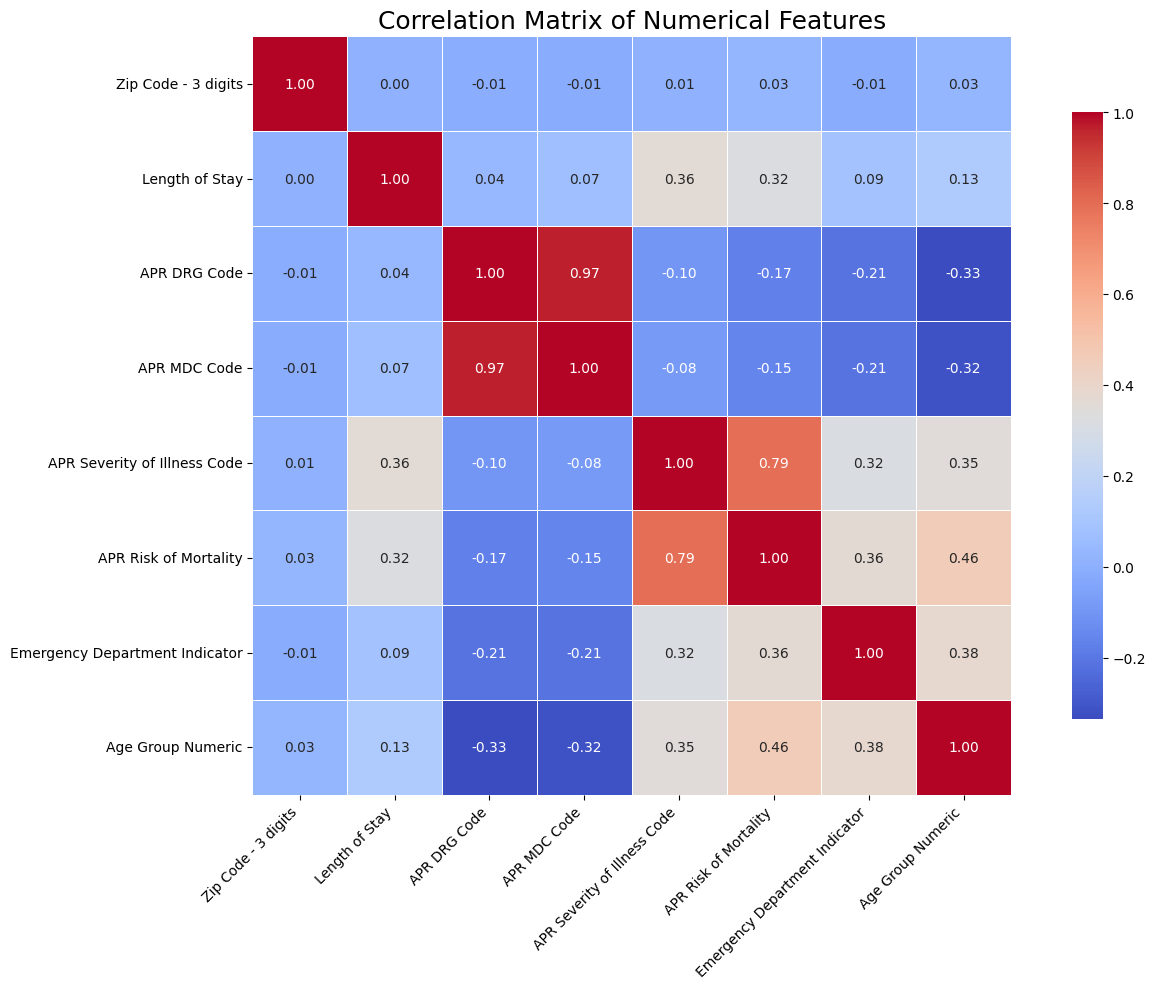


Correlation of features with target variable:


,Length of Stay
Length of Stay,1.000000
APR Severity of Illness Code,0.362133
APR Risk of Mortality,0.321607
Age Group Numeric,0.130951
Emergency Department Indicator,0.086348
APR MDC Code,0.068960
APR DRG Code,0.040465
Zip Code - 3 digits,0.004321


In [15]:
# ================================================================================
# PART 8: CORRELATION MATRIX ANALYSIS
# ================================================================================
import numpy as np

print("\n" + "=" * 80)
print("PHASE 4: CORRELATION MATRIX ANALYSIS")
print("=" * 80)

# 1. Correlation only among numeric features (including Length of Stay)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Optional: Drop columns with too many NaNs
numeric_df = numeric_df.dropna(axis=1, thresh=len(df) * 0.9)
numeric_df = numeric_df.drop('Discharge Year', axis=1)
# 2. Compute correlation matrix
correlation_matrix = numeric_df.corr()

# 3. Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Optional: Sort correlation with target variable
print("\nCorrelation of features with target variable:")
target_corr = correlation_matrix['Length of Stay'].sort_values(ascending=False)
display(target_corr)


In [16]:
import altair as alt
import pandas as pd
import numpy as np

# Function to prepare summary stats for bar + error plots
def prepare_summary(df, cat_col, target_col):
    grouped = df.groupby(cat_col)[target_col].agg(['mean', 'std', 'count']).reset_index()
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    grouped['lower'] = grouped['mean'] - grouped['se']
    grouped['upper'] = grouped['mean'] + grouped['se']
    grouped.columns = [cat_col, 'mean', 'std', 'count', 'se', 'lower', 'upper']
    return grouped

# List of categorical variables
categorical_vars = [
    'Race', 'Ethnicity', 'Gender', 'Type of Admission',
    'Hospital Service Area', 'Age Group',
    'APR Severity of Illness Code', 'APR Risk of Mortality',
    'Payment Typology 1'
]

# Collect charts in a list
charts = []

for cat in categorical_vars:
    summary_df = prepare_summary(df, cat, 'Length of Stay')

    base = alt.Chart(summary_df).encode(
        x=alt.X(f'{cat}:N', sort='-y', title=cat),
        y=alt.Y('mean:Q', title='Avg Length of Stay'),
        tooltip=[cat, 'mean', 'se', 'count']
    )

    bars = base.mark_bar(color='lightblue')
    error = base.mark_errorbar().encode(
        y='lower:Q',
        y2='upper:Q'
    )

    chart = (bars + error).properties(
        width=250,
        height=250,
        title=f'{cat} vs Length of Stay'
    )

    charts.append(chart)

# Arrange charts in a grid (3 columns per row)
rows = [alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)]
final_grid = alt.vconcat(*rows)

# Apply global config (after grid is built)
final_grid = final_grid.configure_axisX(labelAngle=45).configure_title(fontSize=14)

final_grid


alt.VConcatChart(...)

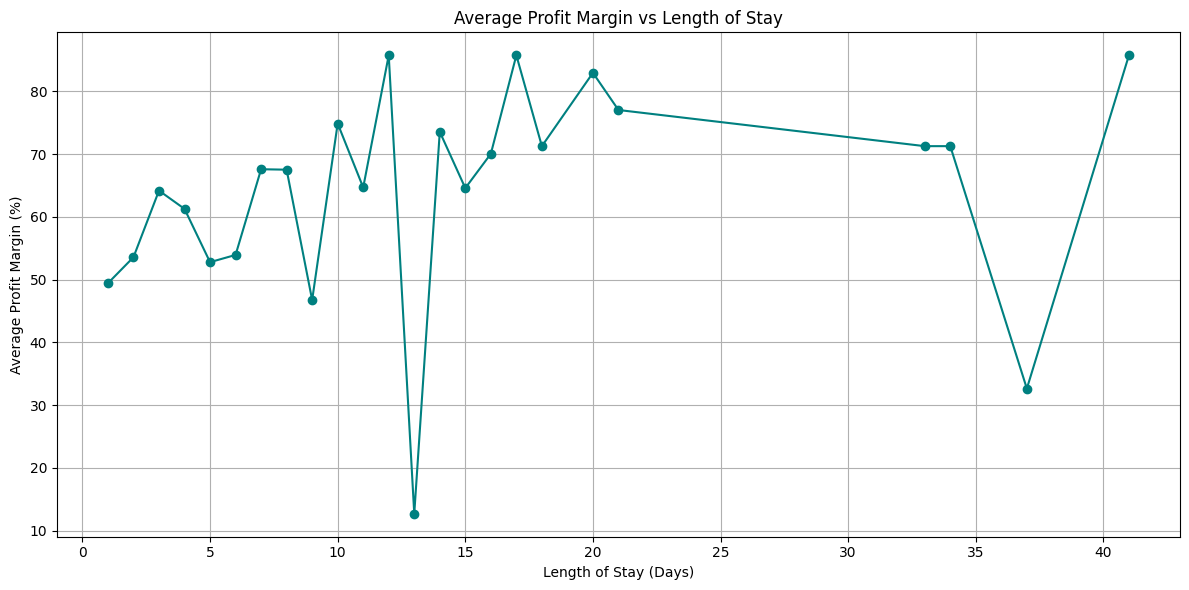

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df3 = df.copy()

# Step 1: Calculate profit margin (%)
df3['Profit Margin %'] = ((df3['Total Charges'] - df3['Total Costs']) / df3['Total Charges']) * 100

# Clean up: remove NaN and extreme outliers (optional but helps clarity)
df_line = df3[(df3['Profit Margin %'].notnull()) & (df3['Profit Margin %'] < 1000)]

# Step 2: Group by Length of Stay and calculate average profit margin
los_profit = df_line.groupby('Length of Stay')['Profit Margin %'].mean().reset_index()

# Step 3: Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(los_profit['Length of Stay'], los_profit['Profit Margin %'], marker='o', color='teal')
plt.title("Average Profit Margin vs Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Profit Margin (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


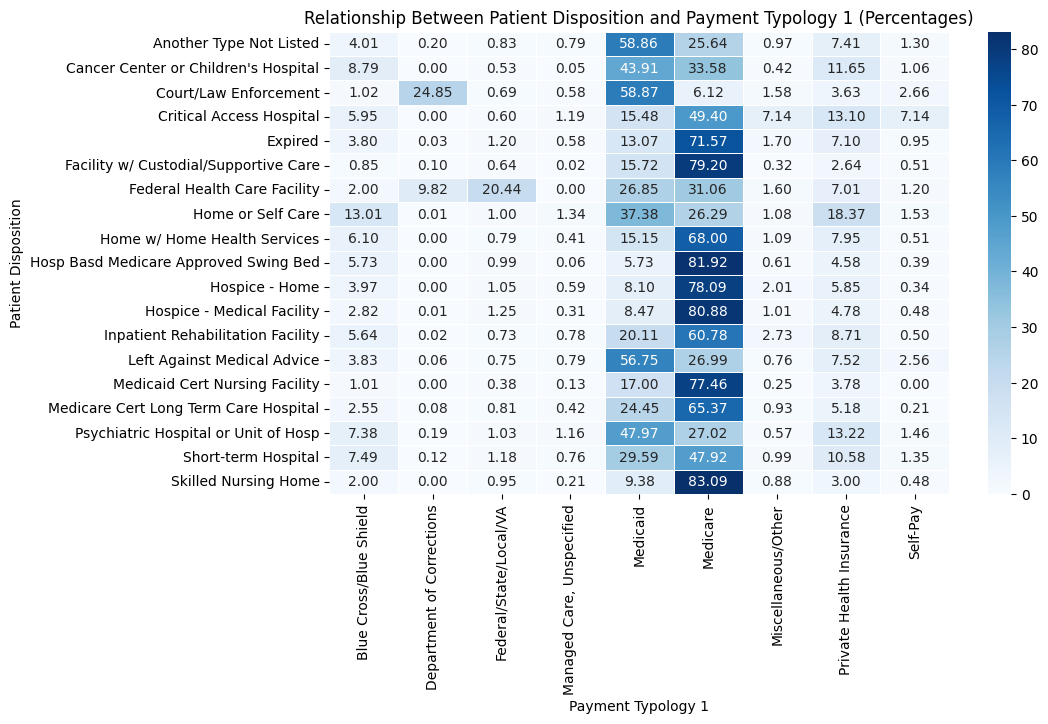

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cross-tabulation (Contingency Table)
contingency_table = pd.crosstab(df['Patient Disposition'], df['Payment Typology 1'])

# Normalize by rows to get percentage within each Patient Disposition
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Print the contingency table with percentages
# print("Contingency Table with Percentages:\n", contingency_table_percentage)

# 2. Visualizing the relationship using a heatmap with percentages
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=True, linewidths=0.5)
plt.title('Relationship Between Patient Disposition and Payment Typology 1 (Percentages)')
plt.ylabel('Patient Disposition')
plt.xlabel('Payment Typology 1')
plt.show()


<ipython-input-19-3f87037376c4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_sorted.head(15), y='CCSR Diagnosis Description', x='Profit Margin %', palette='coolwarm')


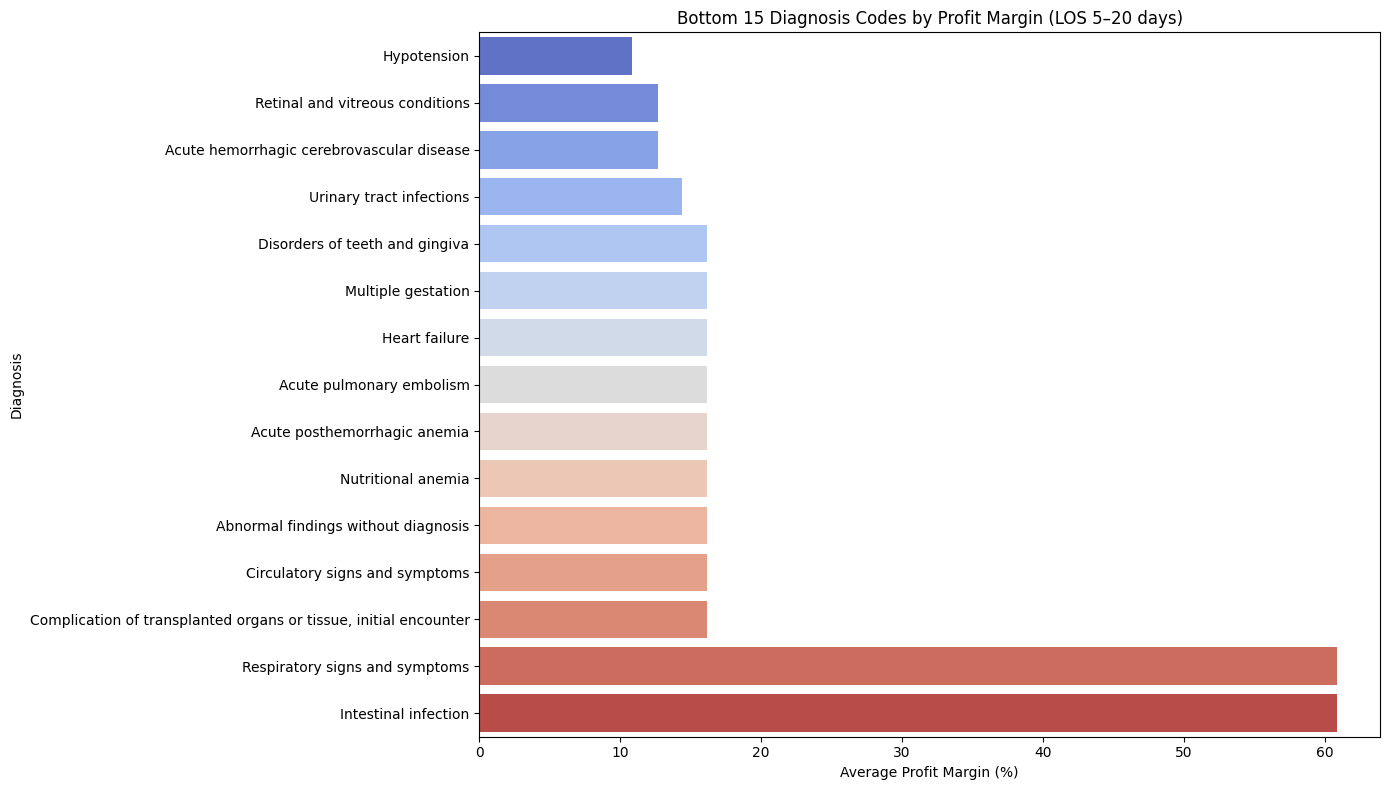

In [19]:
import seaborn as sns
# Step 1: Filter the main dataset for LOS between 5 and 20 days
df_subset = df_line[(df_line['Length of Stay'] >= 5) & (df_line['Length of Stay'] <= 20)]

# Step 2: Group by CCSR Diagnosis Code (or other categorical segments)
grouped = df_subset.groupby('CCSR Diagnosis Code').agg({
    'Profit Margin %': 'mean',
    'Length of Stay': 'mean',
    'Total Charges': 'mean',
    'Total Costs': 'mean',
    'CCSR Diagnosis Description': 'first',
    'Type of Admission': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'APR Severity of Illness Code': 'mean'
}).reset_index()

# Step 3: Sort by average profit margin
grouped_sorted = grouped.sort_values('Profit Margin %')

# Step 4: Plot the bottom 15 codes by profit margin
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_sorted.head(15), y='CCSR Diagnosis Description', x='Profit Margin %', palette='coolwarm')
plt.title("Bottom 15 Diagnosis Codes by Profit Margin (LOS 5–20 days)")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()


## PART 9: FEATURE SELECTION

In [20]:
# ================================================================================
# PART 9: FEATURE SELECTION
# ================================================================================
# Dropping columns with very high missing values
# Calculate the fraction of missing values per column.
missing_fraction = df.isnull().mean()

# Identify columns where at least 50% of the values are missing.
cols_to_drop = missing_fraction[missing_fraction >= 0.50].index.tolist()

print("Columns to drop (>= 50% missing):", cols_to_drop)

# Drop these columns from the DataFrame.
df = df.drop(columns=cols_to_drop)

drop_cols = [
    'Operating Certificate Number',
    'Permanent Facility Id',
    'Facility Name',
    'CCSR Diagnosis Description',
    'CCSR Procedure Description',
    'APR DRG Description',
    'APR MDC Description',
    'CCSR Procedure Code',
    'APR Severity of Illness Description',
    # 'APR Medical Surgical Description',
    'Zip Code - 3 digits'
]
df.drop(columns=drop_cols, inplace=True)
df.drop(columns=['LOS_bucket'], inplace=True)


Columns to drop (>= 50% missing): ['Payment Typology 2', 'Payment Typology 3', 'Birth Weight', 'Total Charges', 'Total Costs']


Some columns from the dataframe are removed based on redundancy, high missing values etc. Explained below:
- CCSR Procedure Code -- Highly correlated with CCSR Diagnosis Code, since Procedure Code has higher missingness it's dropped


- APR DRG Code & APR MDC Code

- Payment Typology 2 / 3: These columns have many missing values.

- Birth Weight: Mostly relevant for newborns & has many missing values

- Zip Code (3-digit)


Categorical Variables vs LOS_class (Cramér’s V):


,Feature,Cramers_V
7,CCSR Diagnosis Code,0.365251
2,Age Group,0.210487
6,Type of Admission,0.196823
8,Payment Typology 1,0.174779
1,Hospital County,0.059613
3,Gender,0.052535
4,Race,0.052256
5,Ethnicity,0.040270
0,Hospital Service Area,0.038166


<ipython-input-21-f21e4730e036>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cramer_df, x='Cramers_V', y='Feature', palette='viridis')


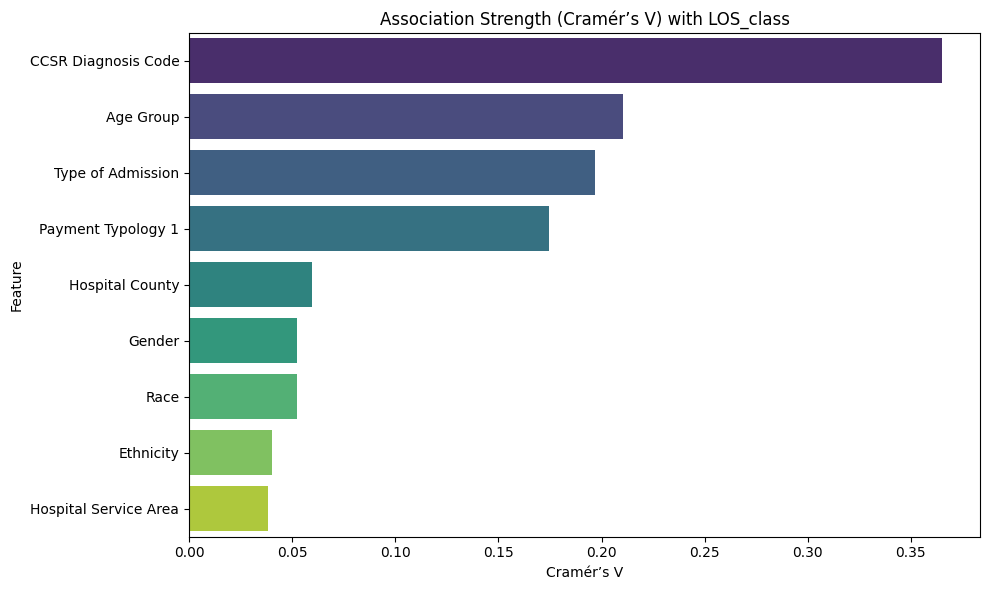

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Helper: Cramér’s V for categorical associations
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Choose your target
target = 'LOS_class'

# Identify categorical features
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features = [col for col in cat_features if col != target]
cat_features = [col for col in cat_features if col != 'Patient Disposition']
# Encode LOS_class
le = LabelEncoder()
df['LOS_class_encoded'] = le.fit_transform(df[target])

# Categorical associations (Cramér's V)
cramer_results = []
for col in cat_features:
    confusion_mat = pd.crosstab(df[col], df[target])
    cramer_v = cramers_v(confusion_mat)
    cramer_results.append((col, cramer_v))

cramer_df = pd.DataFrame(cramer_results, columns=['Feature', 'Cramers_V'])
cramer_df = cramer_df.sort_values(by='Cramers_V', ascending=False)

# Show table
print("\nCategorical Variables vs LOS_class (Cramér’s V):")
display(cramer_df)

# Heatmap
plt.figure(figsize=(10, 6))
sns.barplot(data=cramer_df, x='Cramers_V', y='Feature', palette='viridis')
plt.title("Association Strength (Cramér’s V) with LOS_class")
plt.xlabel("Cramér’s V")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [22]:
# Ensure LOS_class is ordered (if it's categorical)
df['LOS_class'] = pd.Categorical(df['LOS_class'], categories=["1-2", "3-5", "6+"], ordered=True)

# Map to numeric for calculation
los_numeric = df['LOS_class'].cat.codes  # 0 = 1-2, 1 = 3-5, 2 = 6+

# Combine back to dataframe
df_los = df.copy()
df_los['LOS_numeric'] = los_numeric

# Group by diagnosis code
grouped = df_los.groupby('CCSR Diagnosis Code')['LOS_numeric'].agg(['mean', 'count']).reset_index()

# Filter only codes with enough samples (e.g. at least 50 cases)
grouped = grouped[grouped['count'] >= 50]

# Top 10 with highest LOS
top_high_los = grouped.sort_values('mean', ascending=False).head(10)

# Top 10 with lowest LOS
top_low_los = grouped.sort_values('mean', ascending=True).head(10)

# print("🏥 Diagnosis Codes with Highest Avg LOS Class:")
# print(top_high_los)

# print("\n🩺 Diagnosis Codes with Lowest Avg LOS Class:")
# print(top_low_los)

# Step 1: Map description from df_original
code_to_desc = df_original[['CCSR Diagnosis Code', 'CCSR Diagnosis Description']].drop_duplicates()
df = df.merge(code_to_desc, on='CCSR Diagnosis Code', how='left')

df2 = df.copy()
# Step 2: Prepare LOS numeric
df2['LOS_class'] = pd.Categorical(df2['LOS_class'], categories=["1-2", "3-5", "6+"], ordered=True)
df2['LOS_numeric'] = df2['LOS_class'].cat.codes

# Step 3: Group and aggregate
grouped = (
    df2.groupby(['CCSR Diagnosis Code', 'CCSR Diagnosis Description'])['LOS_numeric']
    .agg(['mean', 'count'])
    .reset_index()
)

# Step 4: Filter for significant groups (e.g., at least 50 patients)
grouped = grouped[grouped['count'] >= 50]

# Step 5: Get top/bottom
top_high_los = grouped.sort_values('mean', ascending=False).head(10)
top_low_los = grouped.sort_values('mean', ascending=True).head(10)

# Show results
print("🏥 Diagnosis Codes with Highest Avg LOS Class:")
print(top_high_los)

print("\n🩺 Diagnosis Codes with Lowest Avg LOS Class:")
print(top_low_los)


🏥 Diagnosis Codes with Highest Avg LOS Class:
    CCSR Diagnosis Code                         CCSR Diagnosis Description  \
109              FAC008                        Neoplasm-related encounters   
200              INJ045  Traumatic brain injury (TBI); concussion, subs...   
201              INJ046     Spinal cord injury (SCI), subsequent encounter   
198              INJ043  Fracture of the neck of the femur (hip), subse...   
195              INJ040            Fracture of torso, subsequent encounter   
31               CIR022     Sequela of hemorrhagic cerebrovascular disease   
248              MBD010                       Feeding and eating disorders   
194              INJ039  Fracture of the spine and back, subsequent enc...   
202              INJ047        Internal organ injury, subsequent encounter   
34               CIR025  Sequela of cerebral infarction and other cereb...   

         mean  count  
109  1.888087    277  
200  1.856130    987  
201  1.847826    230  
198

In [23]:
df[df['CCSR Diagnosis Code']=='INJ046']

,Hospital Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,...,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,APR Medical Surgical Description_Not Applicable,APR Medical Surgical Description_Surgical,Age Group Numeric,LOS_class,LOS_class_encoded,CCSR Diagnosis Description
31538,Hudson Valley,Westchester,18 to 29,M,Black/African American,Not Span/Hispanic,68.0,Elective,Home or Self Care,1640995200000000000,...,3,2.0,Miscellaneous/Other,0,False,False,27,6+,2,"Spinal cord injury (SCI), subsequent encounter"
45220,New York City,Manhattan,50 to 69,M,White,Not Span/Hispanic,37.0,Elective,Skilled Nursing Home,1640995200000000000,...,3,1.0,Medicare,0,False,False,58,6+,2,"Spinal cord injury (SCI), subsequent encounter"
55006,Capital/Adirond,Albany,18 to 29,M,Other Race,Unknown,8.0,Elective,Home or Self Care,1640995200000000000,...,4,2.0,"Managed Care, Unspecified",0,False,False,27,6+,2,"Spinal cord injury (SCI), subsequent encounter"
63679,Hudson Valley,Westchester,18 to 29,M,Black/African American,Not Span/Hispanic,21.0,Elective,Home w/ Home Health Services,1640995200000000000,...,3,1.0,Private Health Insurance,0,False,False,27,6+,2,"Spinal cord injury (SCI), subsequent encounter"
66444,Hudson Valley,Westchester,0 to 17,M,White,Not Span/Hispanic,27.0,Elective,Home w/ Home Health Services,1640995200000000000,...,3,1.0,Miscellaneous/Other,0,False,False,9,6+,2,"Spinal cord injury (SCI), subsequent encounter"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097579,Capital/Adirond,Schenectady,50 to 69,M,White,Not Span/Hispanic,34.0,Elective,Skilled Nursing Home,1640995200000000000,...,4,3.0,Medicaid,0,False,False,58,6+,2,"Spinal cord injury (SCI), subsequent encounter"
2097714,Capital/Adirond,Schenectady,70 or Older,M,White,Not Span/Hispanic,14.0,Elective,Short-term Hospital,1640995200000000000,...,3,2.0,Medicare,0,False,False,70,6+,2,"Spinal cord injury (SCI), subsequent encounter"
2097730,Capital/Adirond,Schenectady,30 to 49,M,White,Unknown,48.0,Elective,Home or Self Care,1640995200000000000,...,4,3.0,Medicaid,0,False,False,43,6+,2,"Spinal cord injury (SCI), subsequent encounter"
2097763,Capital/Adirond,Schenectady,50 to 69,F,White,Not Span/Hispanic,13.0,Elective,Home or Self Care,1640995200000000000,...,3,1.0,Private Health Insurance,0,False,False,58,6+,2,"Spinal cord injury (SCI), subsequent encounter"


## Part 10: CLASS IMBALANCE

In [24]:
# import pandas as pd
# from imblearn.over_sampling import SMOTENC
# from sklearn.preprocessing import LabelEnhcoder

# # Define your target variable and categorical features
# target = 'LOS_class'

# categorical_features = ['Gender', 'Type of Admission', 'Hospital Service Area','Hospital County',
#                         'Race', 'Ethnicity','Patient Disposition',
#                         'Age Group', 'APR Severity of Illness Code',
#                        'APR Risk of Mortality','Payment Typology 1','CCSR Diagnosis Code',
#                         'APR DRG Code', 'APR MDC Code','APR Severity of Illness Code']

# # First encode categorical variables for features, but keep 'LOS_class' as is
# df_encoded = df.copy()
# le = LabelEncoder()

# # Encoding the categorical features except for the target 'LOS_class'
# for col in categorical_features:
#     df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# # Convert 'LOS_class' to categorical
# df_encoded[target] = pd.Categorical(df_encoded[target])

# # Define X and y
# X = df_encoded.drop(target, axis=1)
# y = df_encoded[target]

# # List of indices for categorical features (after encoding)
# cat_indices = [X.columns.get_loc(col) for col in categorical_features]

# # Apply SMOTENC for oversampling
# smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# # Print the distribution of the target variable before and after resampling
# print("Original target distribution:\n", y.value_counts())
# print("Resampled target distribution:\n", pd.Series(y_resampled).value_counts())


## MODELING

In [25]:
df.drop(columns=['CCSR Diagnosis Description'], inplace=True)

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight


# Assuming df is your original dataframe, make sure to encode your categorical features.

# Convert categorical columns to 'category' dtype
categorical_columns = [
    'Hospital Service Area', 'Hospital County', 'Age Group', 'Gender',
    'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition',
    'CCSR Diagnosis Code', 'Payment Typology 1'
]

# Convert these columns to category dtype
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Encode the target variable (LOS_class)
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['LOS_class'] = le.fit_transform(df_encoded['LOS_class'])  # 0, 1, 2

# Define features and target
X = df_encoded.drop('LOS_class', axis=1)
y = df_encoded['LOS_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----- Handle class imbalance -----
class_counts = np.bincount(y_train)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Instantiate the model
xgb_model = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    random_state=42,
)

# Train the model
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

         1-2       1.00      1.00      1.00    167015
         3-5       1.00      1.00      1.00    130260
          6+       1.00      1.00      1.00    122408
         nan       1.00      1.00      1.00       420

    accuracy                           1.00    420103
   macro avg       1.00      1.00      1.00    420103
weighted avg       1.00      1.00      1.00    420103


Confusion Matrix:
[[167015      0      0      0]
 [     0 130260      0      0]
 [     0      0 122408      0]
 [     0      0      0    420]]


In [27]:
df.drop(columns=['Length of Stay','LOS_class_encoded'], inplace=True)

In [28]:
df = df[df['LOS_class'].notna()]
